# Inferential Simulation
By: Adam Li

Assumptions:
We want to create a statistical model for our data and simulate a prospective power analysis. We take our dataset, ${x1_i, ..., x24_i}$ that are drawn i.i.d. from $F_{x1,...,x24}$, which belongs to a family of distributions. 

Our 24 variables represent the 24 different proteins being expressed and measured for a set of 6 metrics ${f_0,...,f_5}$

Formalize A Test:

$$H_o: $$
$$H_a: $$

Describe Test Statistic:
How are we getting a test statistic for our null and alternative hypothesis test? 

Sample from Null and Alternative Distribution:
The choice of the magnitude of the null/alternative differences will affect the power because it affects the overlap of the distributions. If you can't analytically formulate your distribution for test statistics, then you will need to somehow get an estimate of your distributions instead. You can simulate samples many many times.



In [2]:
# Import Necessary Libraries
import numpy as np
import os, csv, json

from matplotlib import *
from matplotlib import pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
import scipy
from sklearn.decomposition import PCA
import skimage.measure

# pretty charting
import seaborn as sns
sns.set_palette('muted')
sns.set_style('darkgrid')

%matplotlib inline

In [3]:
#### RUN AT BEGINNING AND TRY NOT TO RUN AGAIN - TAKES WAY TOO LONG ####
# write new list_of_features to new txt file
csvfile = "synapsinR_7thA.tif.Pivots.txt.2011ShortenedFeatures.txt"

# load in the feature data
list_of_features = []
with open(csvfile) as file:
    for line in file:
        inner_list = [float(elt.strip()) for elt in line.split(',')]
        
        # create list of features
        list_of_features.append(inner_list)

# conver to a numpy matrix
list_of_features = np.array(list_of_features)

In [66]:
###### RUN TO SAVE NORMALIZED SHORTENED FEATURES #########
num_rows, num_cols = np.shape(list_of_features)

# initialize normalize_features matrix
normalize_features = np.empty((num_rows,num_cols))

# normalize all features (columns)
for i in range(0, num_cols):
    col_max = max(list_of_features[:,i])
    buff = list_of_features[:,i]/col_max
    normalize_features[:,i] = buff

# write new list_of_features to new txt file
csvfile = "data_normalized/shortenedFeatures_normalized.txt"

#Assuming res is a flat list
with open(csvfile, "w") as output:
    # write to new file the data
    writer = csv.writer(output, lineterminator='\n')
    for row in range(0, len(normalize_features)):
        writer.writerow(normalize_features[row,:])

In [67]:
# Compute feature correlation matrix
R = np.corrcoef(list_of_features,rowvar=0)
R_normalize = np.corrcoef(normalize_features, rowvar=0)

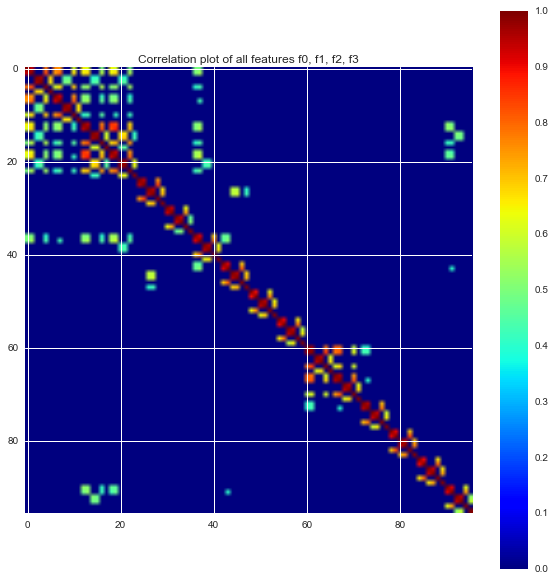

In [68]:

temp = R_normalize
temp = temp < 0.4
buff = R_normalize
buff[temp] = 0
fig = plt.figure(figsize=(10,10))
plt.imshow(buff, cmap=plt.get_cmap('jet'))
plt.title("Correlation plot of all features f0, f1, f2, f3")
plt.colorbar()

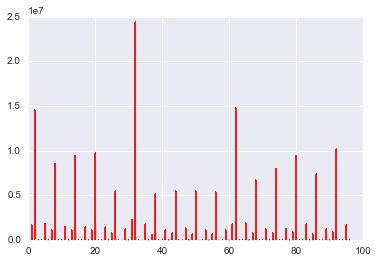

In [70]:
# Make violin plots for each feature
plt.violinplot(list_of_features)
plt.show()